<a href="https://colab.research.google.com/github/ROHITHREDDY1222/AIML_2303A52140/blob/main/Aiml_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

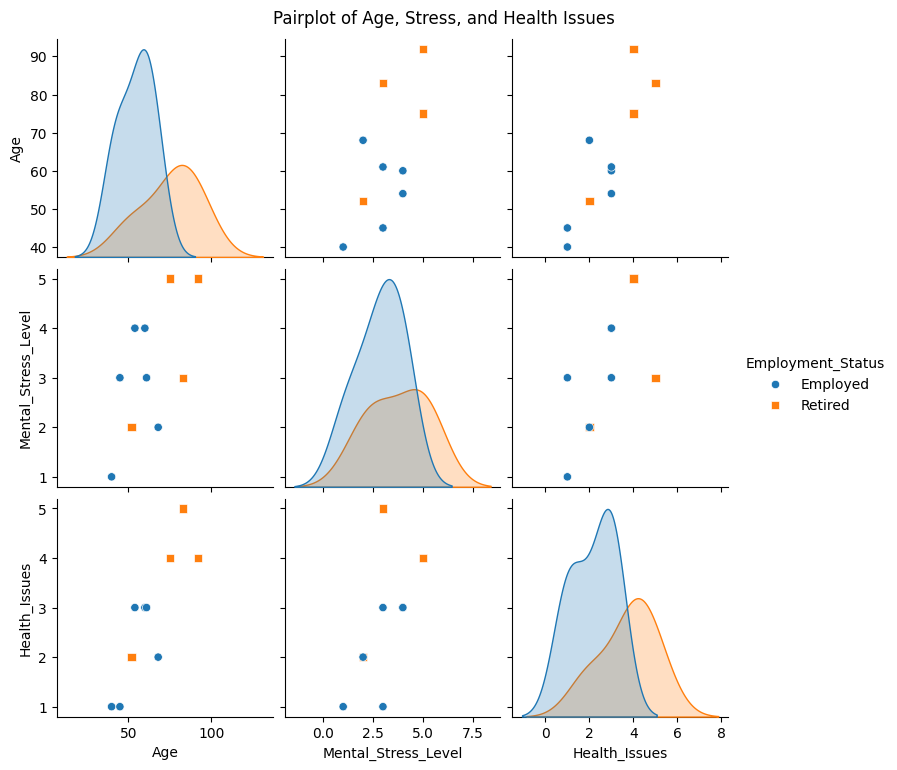

Correlation Matrix:
                          Age  Mental_Stress_Level  Health_Issues
Age                  1.000000             0.620507       0.859555
Mental_Stress_Level  0.620507             1.000000       0.666667
Health_Issues        0.859555             0.666667       1.000000


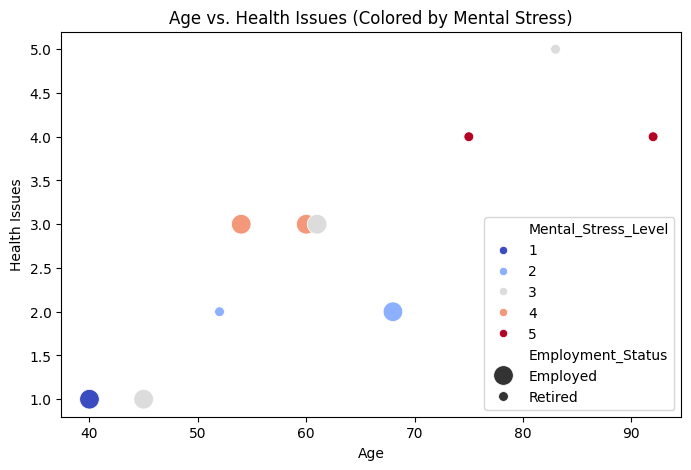

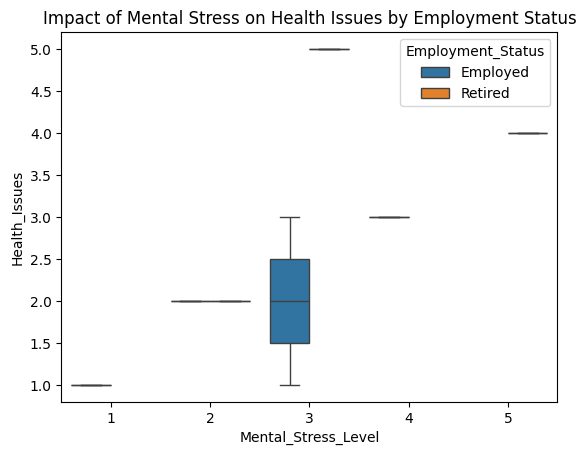

                            OLS Regression Results                            
Dep. Variable:          Health_Issues   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     11.57
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00604
Time:                        04:16:42   Log-Likelihood:                -9.1135
No. Observations:                  10   AIC:                             24.23
Df Residuals:                       7   BIC:                             25.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5179    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Age': [45, 52, 60, 75, 83, 68, 54, 92, 40, 61],
    'Employment_Status': ['Employed', 'Retired', 'Employed', 'Retired', 'Retired', 'Employed', 'Employed', 'Retired', 'Employed', 'Employed'],
    'Mental_Stress_Level': [3, 2, 4, 5, 3, 2, 4, 5, 1, 3],  # Scale 1-5 (1 = Low Stress, 5 = High Stress)
    'Health_Issues': [1, 2, 3, 4, 5, 2, 3, 4, 1, 3]  # Scale 1-5 (1 = Low Issues, 5 = High Issues)
}

# Create DataFrame
df = pd.DataFrame(data)

# Visualizing the dataset with pairplot
sns.pairplot(df, hue='Employment_Status', markers=["o", "s"])
plt.suptitle("Pairplot of Age, Stress, and Health Issues", y=1.02)
plt.show()

# Correlation analysis
# Selecting only numeric columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns
correlation = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation)

# Scatter plot for Age vs. Health Issues
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Health_Issues', hue='Mental_Stress_Level', palette='coolwarm', size='Employment_Status', sizes=(50, 200))
plt.title('Age vs. Health Issues (Colored by Mental Stress)')
plt.xlabel('Age')
plt.ylabel('Health Issues')
plt.show()

# Analyzing the impact of stress and employment on health issues
sns.boxplot(x='Mental_Stress_Level', y='Health_Issues', data=df, hue='Employment_Status')
plt.title("Impact of Mental Stress on Health Issues by Employment Status")
plt.show()

# Basic linear regression to predict health issues based on age and stress
import statsmodels.api as sm

# Prepare the data
X = df[['Age', 'Mental_Stress_Level']]  # Independent variables
X = sm.add_constant(X)  # Add constant for intercept
y = df['Health_Issues']  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())